### Decision Tree

In [2]:
# install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load a dataset related to the study of C prostate cancer, which contains information on 146 patients.
data(stagec)
colnames(stagec)

[1] "pgtime"  "pgstat"  "age"     "eet"     "g2"      "grade"   "gleason"
[8] "ploidy"

In [4]:
# create a tree model
cfit <- rpart(pgstat ~ age + eet + g2, data = stagec, method = "class")
cfit
# 'loss' represents the number of incorrect labels, commonly known as 0/1 loss
# In the first node, which is the root, 'cfit' predicts 0 for 'stagec$pgstat'.

n= 146 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 146 54 0 (0.6301370 0.3698630)  
  2) g2< 13.2 80 18 0 (0.7750000 0.2250000) *
  3) g2>=13.2 66 30 1 (0.4545455 0.5454545)  
    6) g2>=17.91 26  8 0 (0.6923077 0.3076923) *
    7) g2< 17.91 40 12 1 (0.3000000 0.7000000) *

In [5]:
summary(stagec) # there are NA in this dataset
table(stagec$pgstat[stagec$g2 < 13.2 | is.na(stagec$g2)])

     pgtime           pgstat            age          eet             g2        
 Min.   : 0.300   Min.   :0.0000   Min.   :47   Min.   :1.00   Min.   : 2.400  
 1st Qu.: 3.700   1st Qu.:0.0000   1st Qu.:59   1st Qu.:1.75   1st Qu.: 9.215  
 Median : 5.900   Median :0.0000   Median :63   Median :2.00   Median :13.010  
 Mean   : 6.324   Mean   :0.3699   Mean   :63   Mean   :1.75   Mean   :14.275  
 3rd Qu.: 7.900   3rd Qu.:1.0000   3rd Qu.:67   3rd Qu.:2.00   3rd Qu.:16.715  
 Max.   :17.700   Max.   :1.0000   Max.   :75   Max.   :2.00   Max.   :54.930  
                                                NA's   :2      NA's   :7       
     grade         gleason             ploidy  
 Min.   :1.00   Min.   : 3.00   diploid   :67  
 1st Qu.:2.00   1st Qu.: 5.00   tetraploid:68  
 Median :3.00   Median : 6.00   aneuploid :11  
 Mean   :2.61   Mean   : 6.35                  
 3rd Qu.:3.00   3rd Qu.: 7.00                  
 Max.   :4.00   Max.   :10.00                  
                NA's   :


 0  1 
62 19 

In [7]:
# calculate the total number of patients in 'stagec$pgstat' who have a non-zero value. Check if it matches the 'loss' displayed in the root.
sum(stagec$pgstat != 0)

[1] 54

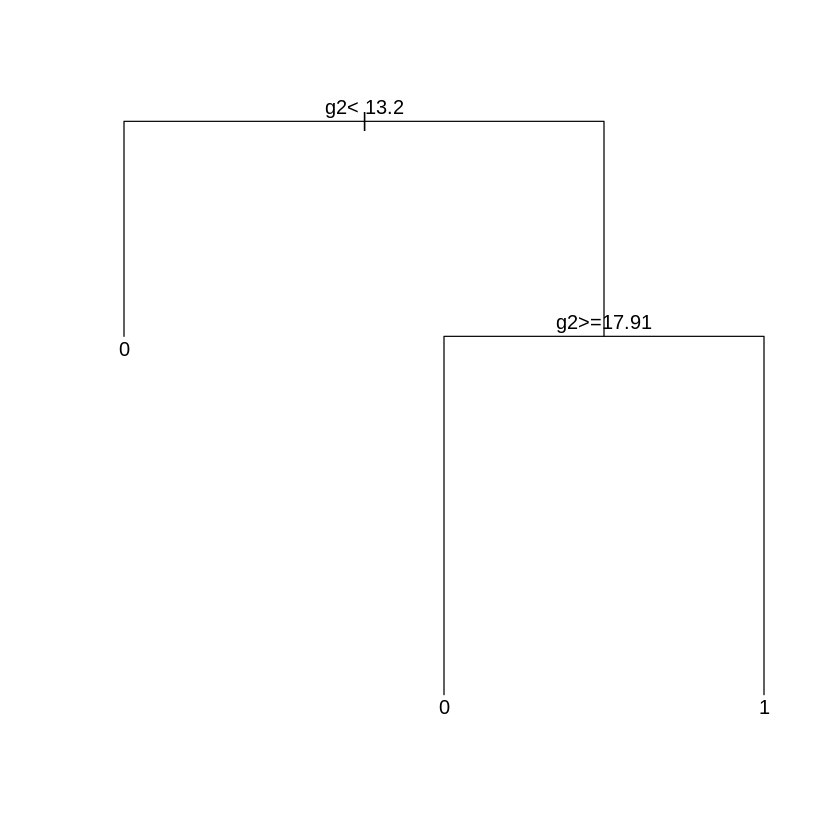

In [6]:
plot(cfit)
text(cfit)

In [8]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



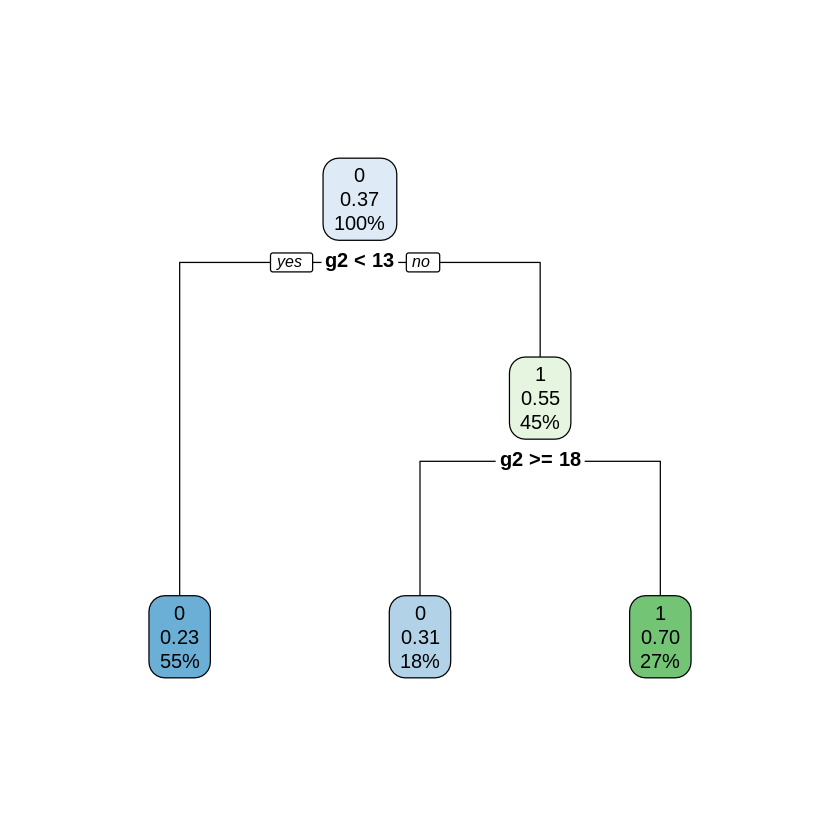

In [9]:
rpart.plot(cfit)

In [10]:
# prediction
pgstat.p <- predict(cfit, stagec)
p <- pgstat.p[, "1"] > pgstat.p[, "0"]
table(stagec$pgstat, p)

   p
    FALSE TRUE
  0    80   12
  1    26   28

In [12]:
cfit2 <- rpart(pgstat ~ age, data = stagec, method = "class", control = rpart.control(minsplit = 1))
pgstat.p <- predict(cfit2, stagec)
p <- pgstat.p[, "1"] > pgstat.p[, "0"]
table(stagec$pgstat, p)
# The model performs worse, but the misclassification is reduced (it still depends on what the model is aiming for).
# Changing the cutoff setting can change the result.
# Allowing only one point to be cut off may lead to overfitting concerns.

   p
    FALSE TRUE
  0    90    2
  1    43   11

In [13]:
# change the method for gaining information gain
rpart(pgstat ~ age, data = stagec, method = "class",
      parms = list(split = "information"), control = rpart.control(minsplit=1))

n= 146 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 146 54 0 (0.6301370 0.3698630)  
    2) age>=50.5 143 51 0 (0.6433566 0.3566434)  
      4) age< 52.5 3  0 0 (1.0000000 0.0000000) *
      5) age>=52.5 140 51 0 (0.6357143 0.3642857)  
       10) age>=58.5 114 38 0 (0.6666667 0.3333333)  
         20) age>=74.5 2  0 0 (1.0000000 0.0000000) *
         21) age< 74.5 112 38 0 (0.6607143 0.3392857)  
           42) age< 73.5 111 37 0 (0.6666667 0.3333333)  
             84) age< 59.5 10  2 0 (0.8000000 0.2000000) *
             85) age>=59.5 101 35 0 (0.6534653 0.3465347)  
              170) age>=60.5 99 33 0 (0.6666667 0.3333333) *
              171) age< 60.5 2  0 1 (0.0000000 1.0000000) *
           43) age>=73.5 1  0 1 (0.0000000 1.0000000) *
       11) age< 58.5 26 13 0 (0.5000000 0.5000000)  
         22) age< 57.5 22 10 0 (0.5454545 0.4545455)  
           44) age>=53.5 19  8 0 (0.5789474 0.4210526) *
           45) age< 53.5 3  1 1 (0.3333333 0.

###Example

Please use `rpart` to train a model on `df.train` such that the model's log loss on `df.test` is less than 12.

In [15]:
install.packages("mlbench")
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
# Calculate the Logarithmic Loss function
logloss <- function(y, p, tol = 1e-4) {
  p[p < tol] <- tol
  p[p > 1 - tol] <- 1 - tol
  -sum(y * log(p) + (1 - y) * log(1 - p))
}

# Load the Ionosphere dataset
data(Ionosphere)

# Define test indices
test.i <- c(4L, 6L, 9L, 13L, 14L, 22L, 31L, 33L, 50L, 52L, 61L, 63L, 68L,
            79L, 91L, 99L, 119L, 135L, 154L, 155L, 160L, 162L, 166L, 194L,
            200L, 219L, 233L, 236L, 237L, 242L, 244L, 248L, 250L, 257L, 261L,
            276L, 278L, 283L, 292L, 310L, 312L, 315L, 319L, 323L, 325L, 327L,
            335L, 337L, 338L, 344L)

# Create the test dataset
df.test <- Ionosphere[test.i, -2]

# Define train indices
train.i <- setdiff(seq_len(nrow(Ionosphere)), test.i)

# Create the train dataset
df.train <- Ionosphere[train.i, -2]

# Fit a model using rpart
model <- rpart(Class ~ ., data = df.train, control = rpart.control(minsplit = 30))

# Predict probabilities for the test dataset
p <- predict(model, df.test)[, "good"]

# Check if the logloss is less than 12
logloss(df.test$Class == "good", p) < 12

logloss(df.train$Class == "good", predict(model, df.train))
logloss(df.test$Class == "good", p)

[1] TRUE

[1] 800.2414

[1] 11.34876

In [31]:
summary(df.train)

 V1            V3                V4                 V5         
 0: 33   Min.   :-1.0000   Min.   :-1.00000   Min.   :-1.0000  
 1:268   1st Qu.: 0.4375   1st Qu.:-0.07111   1st Qu.: 0.3500  
         Median : 0.8628   Median : 0.00876   Median : 0.8131  
         Mean   : 0.6246   Mean   : 0.03055   Mean   : 0.5880  
         3rd Qu.: 1.0000   3rd Qu.: 0.16667   3rd Qu.: 1.0000  
         Max.   : 1.0000   Max.   : 1.00000   Max.   : 1.0000  
       V6                 V7                V8                 V9         
 Min.   :-1.00000   Min.   :-1.0000   Min.   :-1.00000   Min.   :-1.0000  
 1st Qu.:-0.01989   1st Qu.: 0.1904   1st Qu.:-0.04444   1st Qu.: 0.1147  
 Median : 0.01954   Median : 0.7585   Median : 0.01573   Median : 0.6956  
 Mean   : 0.11945   Mean   : 0.5504   Mean   : 0.12472   Mean   : 0.5205  
 3rd Qu.: 0.31543   3rd Qu.: 0.9757   3rd Qu.: 0.43388   3rd Qu.: 0.9580  
 Max.   : 1.00000   Max.   : 1.0000   Max.   : 1.00000   Max.   : 1.0000  
      V10                V1

In [32]:
model <- rpart(Class ~ ., data = df.train, control = rpart.control(minsplit=30))
# model <- rpart(Class ~ V34 + V18 + V17, data = df.train, control = rpart.control(minsplit=1))

p <- predict(model, df.test)[,"good"]
logloss(df.train$Class == "good", predict(model, df.train))
logloss(df.test$Class == "good", p)
logloss(df.test$Class == "good", p) < 12

[1] 800.2414

[1] 11.34876

[1] TRUE

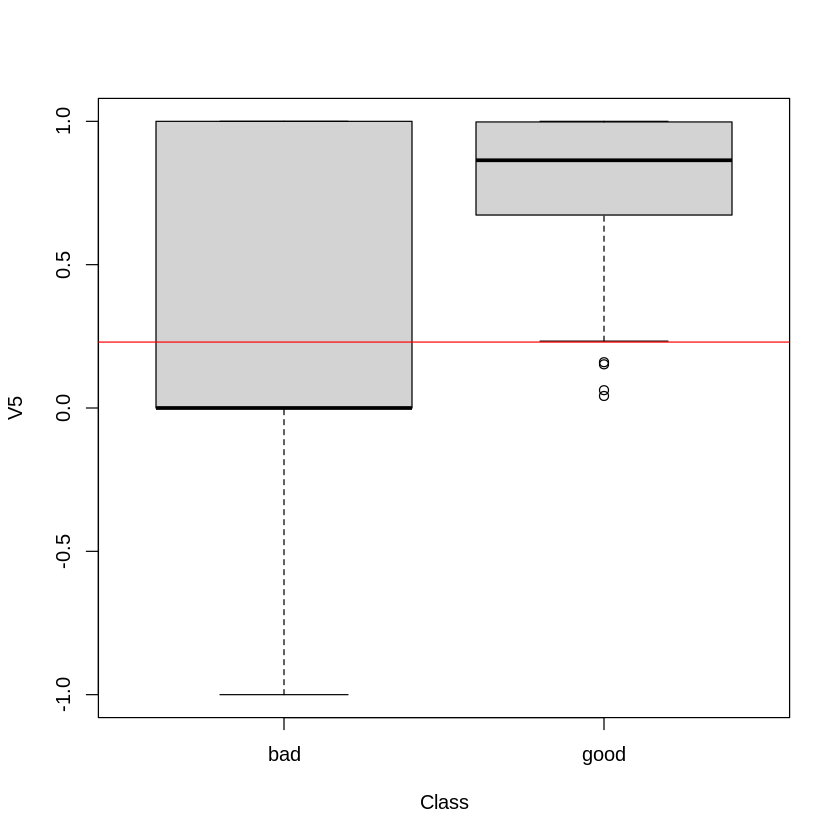

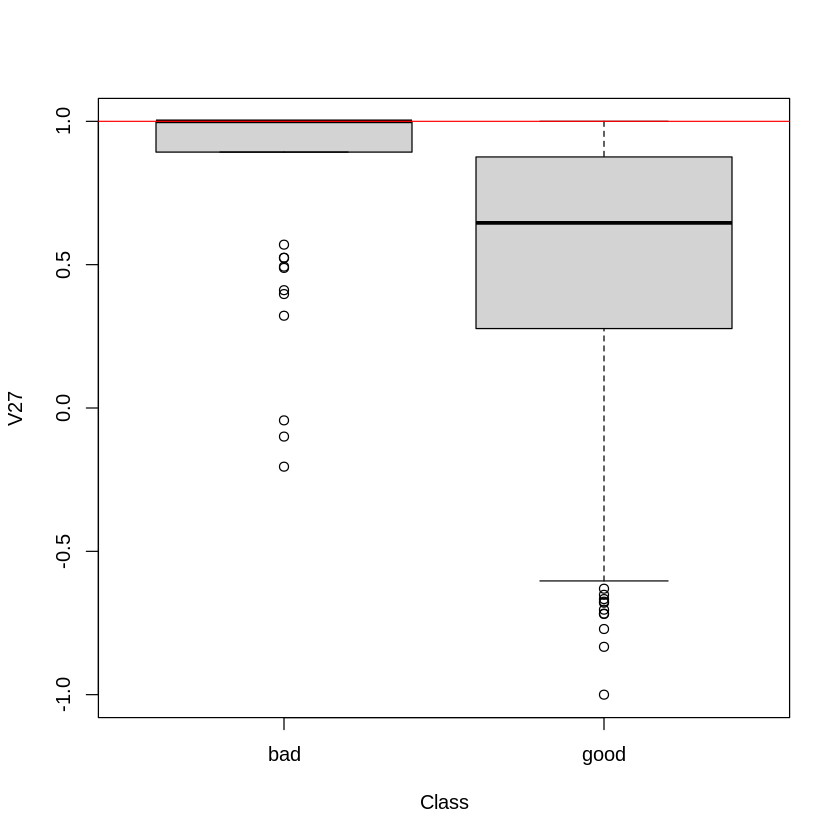

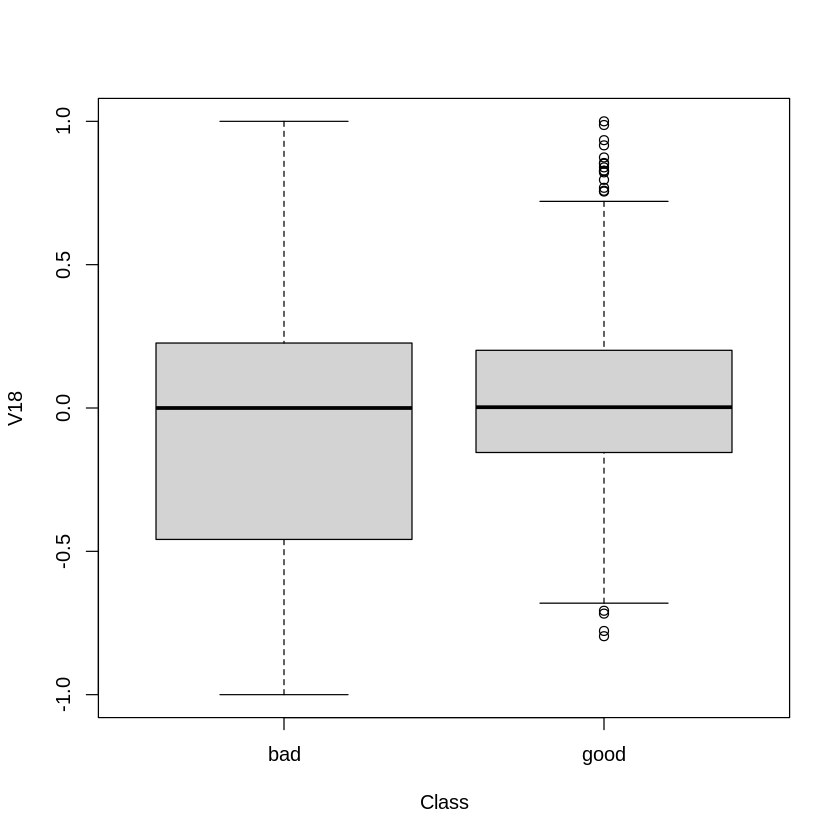

In [36]:
plot(V5~Class, data = df.train)
abline(h = 0.23, col = "red")

plot(V27~Class, data = df.train[df.train$V5 >= 0.23, ])
abline(h = 1, col = "red")

plot(V18~Class, data = df.train)

# V5 and V27 are split variables

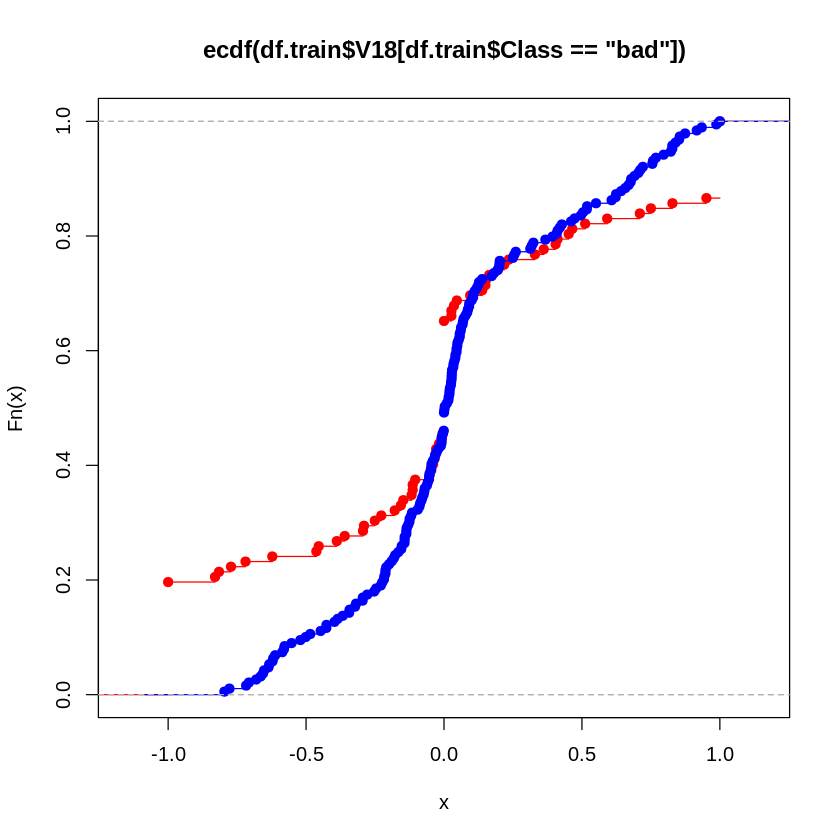

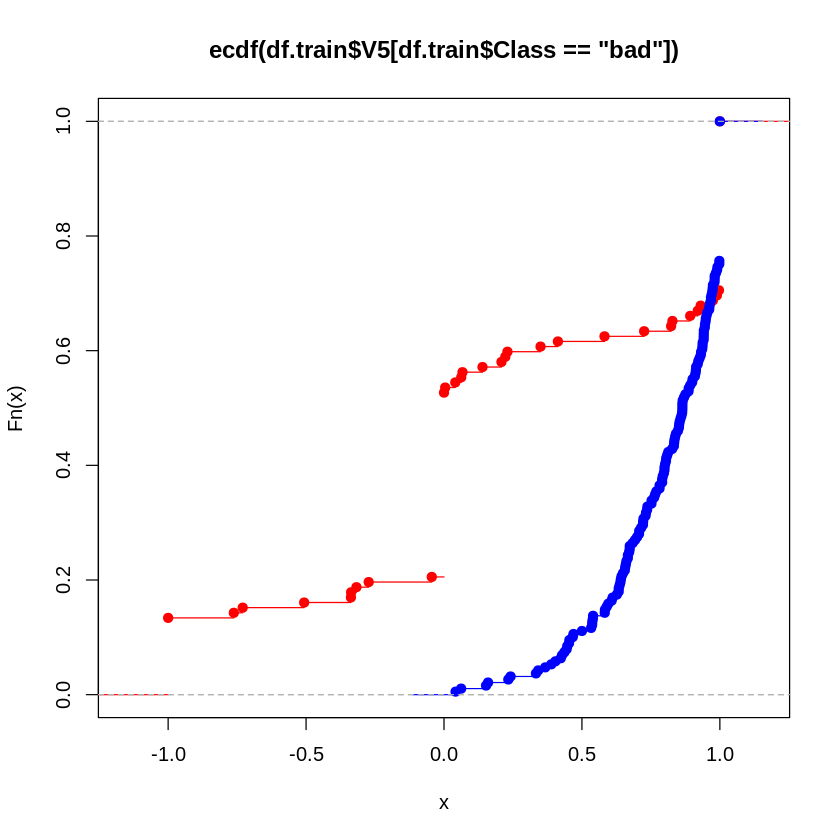

In [37]:
plot(ecdf(df.train$V18[df.train$Class == "bad"]), col = "red")
lines(ecdf(df.train$V18[df.train$Class == "good"]), col = "blue")

plot(ecdf(df.train$V5[df.train$Class == "bad"]), col = "red")
lines(ecdf(df.train$V5[df.train$Class == "good"]), col = "blue")
# Cut at 0.23, and within 'bad', it only captures a tiny bit of 'good'

Manually implement the kNN algorithm to solve classification problems

In [40]:
library(dplyr)

In [41]:
# the necessary data
data(iris3)
assign("X.train", rbind(iris3[1:25,,1], iris3[1:25,,2], iris3[1:25,,3]))
assign("y.train", rep(c("setosa", "versicolor", "virginica"), each = 25))
assign("X.test", rbind(iris3[26:50,,1], iris3[26:50,,2], iris3[26:50,,3]))
assign("y.test", rep(c("setosa", "versicolor", "virginica"), each = 25))

In [39]:
# inspect data
X.train
y.train
X.test
y.test

Sepal L.,Sepal W.,Petal L.,Petal W.
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[26] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[31] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[36] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[41] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[46] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[51] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[56] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[61] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[66] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[71] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

Sepal L.,Sepal W.,Petal L.,Petal W.
5.0,3.0,1.6,0.2
5.0,3.4,1.6,0.4
5.2,3.5,1.5,0.2
5.2,3.4,1.4,0.2
4.7,3.2,1.6,0.2
4.8,3.1,1.6,0.2
5.4,3.4,1.5,0.4
5.2,4.1,1.5,0.1
5.5,4.2,1.4,0.2
4.9,3.1,1.5,0.2


[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[26] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[31] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[36] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[41] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[46] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[51] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[56] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[61] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[66] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[71] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [42]:
# Combine X.train and X.test, and calculate the distances between points
X <- rbind(X.train, X.test)
d <- dist(X) %>%
as.matrix()

In [44]:
# Extract the distances between each point in the test dataset and each point in the training dataset.
d.train = d[1:75, 76:150]
a <- c(1,7,3,2,5)
sort(a)
order(a)

[1] 1 2 3 5 7

[1] 1 4 3 5 2

In [45]:
temp = c("a","b","c","b","b")
table(temp) %>% sort(decreasing = T) %>% names %>% '['(1)

[1] "b"

In [47]:
s = d.train[,1]
i5 = order(s)[1:5]
table(y.train[i5]) %>% sort %>% names %>% '['(1)

[1] "setosa"

In [48]:
# Use 'which.min' to find the closest point in the training dataset for each point in the test dataset.
# 'apply' is to calculate 'which.min' for each point.
i.1nn <- apply(d.train, 2, which.min)
c.5nn <- apply(d.train, 2, function(s) {
    i5 = order(s)[1:5]
    table(y.train[i5]) %>% sort %>% names %>% '['(1)
})
#head(c.5nn)
table(c.5nn, y.test)

            y.test
c.5nn        setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         24         3
  virginica       0          1        22

In [49]:
i.1nn

76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95 
 10  24   1   1   4  10  21  20  16  10   2  11   5   9   8  18   9   4  24   6 
 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 
  2  20   4  11   8  41  34  28  39  45  45  45  43  52  42  32  28  44  37  29 
116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 
 31  39  43  33  31  37  37  50  33  43  53  74  46  55  53  58  68  55  48  54 
136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
 56  66  67  46  63  71  63  52  71  71  63  74  61  66  52

In [51]:
# using 'y.train[i.1nn]', we can obtain the category of the corresponding training data point
# ('y.train[i.1nn]' is the classification result of the 1NN)
table(y.train[i.1nn], y.test)

            y.test
             setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         24         3
  virginica       0          1        22

### class package

In [52]:
# install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
result.1nn = knn(X.train, X.test, y.train, k = 1)

In [54]:
# compare the results calculated by the package with the manually calculated results
table(result.1nn, y.test)

            y.test
result.1nn   setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         24         3
  virginica       0          1        22

### Misssion

Find results that achieve an accuracy of over 0.95.

In [55]:
library(mlbench)
data(Ionosphere)
test.i <- c(4L, 6L, 9L, 13L, 14L, 22L, 31L, 33L, 50L, 52L, 61L, 63L, 68L,
  79L, 91L, 99L, 119L, 135L, 154L, 155L, 160L, 162L, 166L, 194L,
  200L, 219L, 233L, 236L, 237L, 242L, 244L, 248L, 250L, 257L, 261L,
  276L, 278L, 283L, 292L, 310L, 312L, 315L, 319L, 323L, 325L, 327L,
  335L, 337L, 338L, 344L)
df.test <- Ionosphere[test.i,-2] # remove V2
X.test <- df.test[,-34]
y.test <- df.test$Class
train.i <- setdiff(seq_len(nrow(Ionosphere)), test.i)
df.train <- Ionosphere[train.i,-2]
X.train <- df.train[,-34]
y.train <- df.train$Class

# Define a list of distance metrics to test
distance_metrics <- c("euclidean", "maximum", "manhattan", "canberra", "binary", "minkowski")

# Initialize variables to keep track of the best accuracy and distance metric
best_accuracy <- 0
best_distance_metric <- ""

# Iterate through distance metrics
for (metric in distance_metrics) {
  df <- rbind(X.train, X.test)
  d <- dist(df, method = metric)
  m <- as.matrix(d)
  i <- seq_len(nrow(df.train))
  j <- nrow(df.train) + seq_len(nrow(df.test))
  m2 <- m[i,j]
  i.1nn <- apply(m2, 2, which.min)
  accuracy <- mean(y.test == y.train[i.1nn])

  # Check if the accuracy is higher than the best so far
  if (accuracy > best_accuracy) {
    best_accuracy <- accuracy
    best_distance_metric <- metric
  }
}

# Print the best distance metric and accuracy
cat("Best Distance Metric:", best_distance_metric, "\n")
cat("Best Accuracy:", best_accuracy, "\n")


Best Distance Metric: manhattan 
Best Accuracy: 0.96 


In [56]:
accuracy
table(y.test, y.train[i.1nn])

[1] 0.92

      
y.test bad good
  bad   10    4
  good   0   36